## Binary Classification Problem (each text => 0/1)

In [79]:
import numpy as np
from keras.layers import Embedding
from keras.datasets import imdb
from keras import preprocessing
import matplotlib.pyplot as plt
import os
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
from keras.layers import LSTM
from keras import models
from keras import layers
from keras import regularizers

In [3]:
##1. Load the data 
#Training and Validation Data
imdb_dir = 'D:\MSc2\Deep Learning Keras\Ch6\IMDB'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname),encoding="utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [47]:
#Test Data
test_dir = os.path.join(imdb_dir, 'test')

labels2 = []
texts2 = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname),encoding="utf8")
            texts2.append(f.read())
            f.close()
            if label_type == 'neg':
                labels2.append(0)
            else:
                labels2.append(1)

(array([12500.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 12500.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

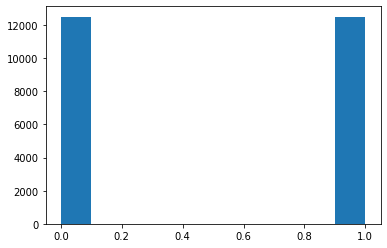

In [4]:
#25000 descriptions and 25000 labels (0/1)
plt.hist(labels)

In [5]:
labels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [6]:
texts[0] #list of text corpus

"Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly."

In [8]:
##2. Data Prep
#1) Tokenize/Vectorize the text
maxlen = 100  # We will cut reviews after 100 words
training_samples = 15000  # We will be training on 25000 samples
validation_samples = 10000  # We will be validating on 25000 samples
max_words = 10000  # We will only consider the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words) #top 10,000 words in the dataset
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts) #2D Integer Array of Input

In [49]:
sequences2 = tokenizer.texts_to_sequences(texts2)

In [18]:
#sequences - list of integers (with different lengths)
word_index = tokenizer.word_index #token: dictionary
print('Found %s unique tokens.' % len(word_index))

Found 88582 unique tokens.


In [20]:
#word_index is a dictionary, for example: 'the':1, 'and': 2,etc

In [22]:
#2) Padding - make sure each sequence of integers have the same length
data = pad_sequences(sequences, maxlen=maxlen) #padded input with 0's

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [30]:
labels[:10] #all 0's and then all 1's

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [32]:
data[0] #list of integer of length 100

array([4311,   44,  298,  234,    9,   13,    3, 1319,    5,  320,    8,
         11,   28,   55,  731, 2280,  588, 1339,  269,  151,   79,   28,
         55,  731, 2280,  844, 2105,  269, 1816,  134, 2682, 1365,  844,
          6,  345,  114,    5,   78,   47,   23,  955,    4,   82, 1076,
       1586,    5,  165,   43,   15,   96,    7,    7, 4517,    6,    1,
         88, 1685,    4,    1,  286, 4517,  105,   35,  227,   10,  420,
          1, 1005,  493,    9,   57,   45,   33,   68,    3,  224,  706,
          1,  362, 1898,  455,  149,  335,  148,    3,   19,   41,    3,
       1702,   40, 1609,   27,   11,  354,   39, 1474,   31,    1, 4517,
       5457])

In [38]:
#3) Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data 
# where sample are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0]) #(0,1,...,24999)
np.random.shuffle(indices) #indices from 0 to 24999 are randomly shuffled
data = data[indices] #shuffle the texts
labels = labels[indices] #shuffle the labels

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples:]
y_val = labels[training_samples:]

In [50]:
x_test = pad_sequences(sequences2, maxlen=maxlen) #Test data is already padded with 0's is applicable
y_test = np.asarray(labels2)

In [ ]:
##3. Model 1 - Densely Connected Network
embedding_dim = 100
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen)) #(10000, 100, 100)
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

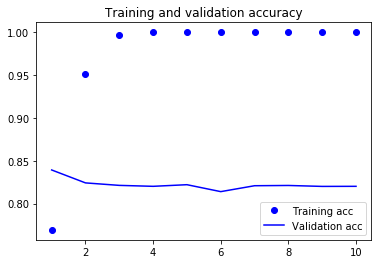

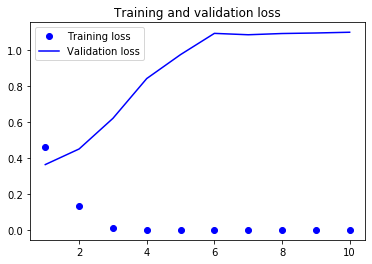

In [46]:
#Loss and Accuracy - Overfitting
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [54]:
model.evaluate(x_test, y_test) #[1.092167787783146, 0.8196] - Accuracy of 82%

25000/25000 [==============================] - 2s 69us/step


[1.092167787783146, 0.8196]

In [60]:
y_pred = model.predict(x_test) #soft predictions

(array([10806.,   488.,   289.,   258.,   241.,   244.,   250.,   327.,
          488., 11609.]),
 array([3.2754634e-21, 1.0000000e-01, 2.0000000e-01, 3.0000001e-01,
        4.0000001e-01, 5.0000000e-01, 6.0000002e-01, 6.9999999e-01,
        8.0000001e-01, 8.9999998e-01, 1.0000000e+00], dtype=float32),
 <a list of 10 Patch objects>)

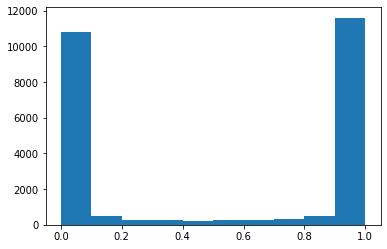

In [63]:
plt.hist(y_pred)

In [66]:
y_pred[y_pred > 0.5] = 1 #Hard predictions
y_pred[y_pred <= 0.5] = 0

(array([12082.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 12918.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

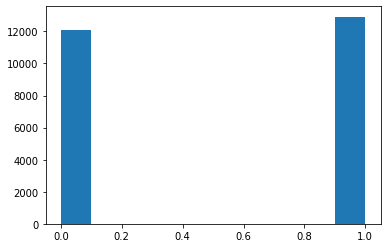

In [67]:
plt.hist(y_pred)

In [68]:
#Error Analysis
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[10036,  2464],
       [ 2046, 10454]], dtype=int64)

In [ ]:
##4. Using LSTM Layers - Single Layer
model = Sequential()
model.add(Embedding(10000, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_val, y_val))

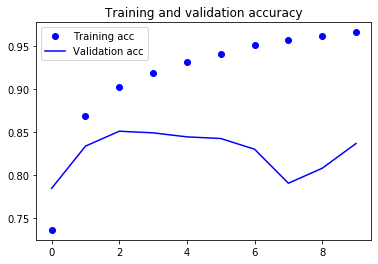

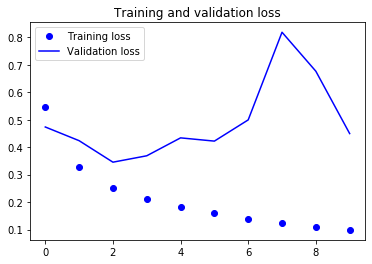

In [71]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [72]:
model.evaluate(x_test, y_test) #[0.47402521876335146, 0.82444] - Accuracy of 82% - Almost same as MLP

25000/25000 [==============================] - 7s 279us/step


[0.47402521876335146, 0.82444]

(array([8756., 1236.,  789.,  641.,  559.,  573.,  694.,  850., 1288.,
        9614.]),
 array([2.4319181e-04, 1.0020694e-01, 2.0017068e-01, 3.0013445e-01,
        4.0009817e-01, 5.0006193e-01, 6.0002565e-01, 6.9998944e-01,
        7.9995316e-01, 8.9991695e-01, 9.9988067e-01], dtype=float32),
 <a list of 10 Patch objects>)

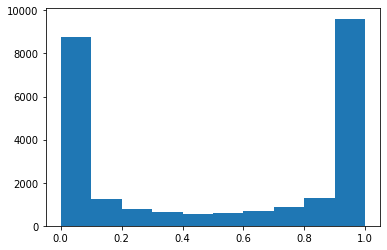

In [73]:
y_pred = model.predict(x_test) #soft predictions
plt.hist(y_pred)

(array([11981.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 13019.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

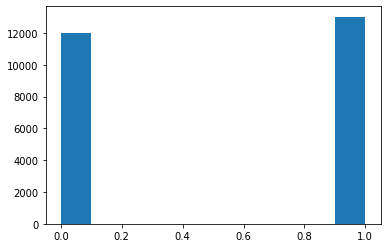

In [74]:
y_pred[y_pred > 0.5] = 1 #Hard predictions
y_pred[y_pred <= 0.5] = 0
plt.hist(y_pred)

In [76]:
#Error Analysis
confusion_matrix(y_test, y_pred)

array([[10046,  2454],
       [ 1935, 10565]], dtype=int64)

In [ ]:
##5. Bidirectional RNN
model = Sequential()
model.add(layers.Embedding(10000, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_val, y_val))

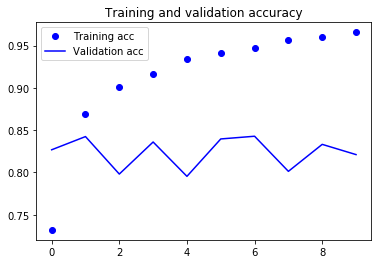

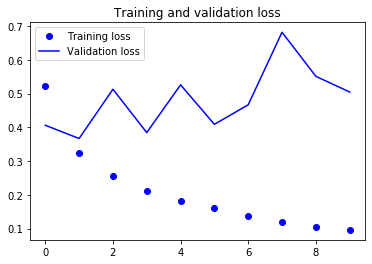

In [82]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [83]:
model.evaluate(x_test, y_test) #[0.47402521876335146, 0.79852] - Accuracy of 80% - Worse same as MLP

25000/25000 [==============================] - 11s 451us/step


[0.5687862016177178, 0.79852]

(array([14367.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 10633.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

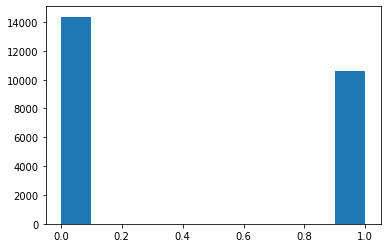

In [84]:
y_pred = model.predict(x_test) #soft predictions
y_pred[y_pred > 0.5] = 1 #Hard predictions
y_pred[y_pred <= 0.5] = 0
plt.hist(y_pred)

In [85]:
#Error Analysis
confusion_matrix(y_test, y_pred)

array([[10915,  1585],
       [ 3452,  9048]], dtype=int64)